##  Project Human Resources Analytics

### Explorativ datenanalyse.

In [1]:
import pandas as pd
import datetime
import glob
from minio import Minio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Laden von der Dataset aus den Data Lake.

In [3]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [4]:
df.head()

department  salary  left  mean_work_last_3_months  number_projects  \
0      sales     low   1.0               266.000000              2.0   
1      sales  medium   1.0               252.000000              5.0   
2      sales  medium   1.0               289.666667              7.0   
3      sales     low   1.0               275.666667              5.0   
4      sales     low   1.0               292.333333              2.0   

   satisfaction_level  last_evaluation  time_in_company  work_accident  
0                38.0             53.0              3.0            0.0  
1                80.0             86.0              6.0            0.0  
2                11.0             88.0              4.0            0.0  
3                72.0             87.0              5.0            0.0  
4                37.0             52.0              3.0            0.0

#### Organization dataset.

In [5]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [6]:
df.head()

department  salary  mean_work_last_3_months  number_projects  \
0      sales     low               266.000000              2.0   
1      sales  medium               252.000000              5.0   
2      sales  medium               289.666667              7.0   
3      sales     low               275.666667              5.0   
4      sales     low               292.333333              2.0   

   satisfaction_level  last_evaluation  time_in_company  work_accident  left  
0                38.0             53.0              3.0            0.0   1.0  
1                80.0             86.0              6.0            0.0   1.0  
2                11.0             88.0              4.0            0.0   1.0  
3                72.0             87.0              5.0            0.0   1.0  
4                37.0             52.0              3.0            0.0   1.0

#### missing value .

In [7]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [8]:
df[df.notnull()]

department  salary  mean_work_last_3_months  number_projects  \
0          sales     low               266.000000              2.0   
1          sales  medium               252.000000              5.0   
2          sales  medium               289.666667              7.0   
3          sales     low               275.666667              5.0   
4          sales     low               292.333333              2.0   
...          ...     ...                      ...              ...   
14995  technical     low               253.333333              2.0   
14996  technical  medium               288.000000              2.0   
14997    support     low               272.000000              6.0   
14998    support     low               276.666667              2.0   
14999        NaN     NaN               261.000000              NaN   

       satisfaction_level  last_evaluation  time_in_company  work_accident  \
0                    38.0             53.0              3.0            0.0   
1                    80.0             86.0              6.0            0.0   
2                    11.0             88.0              4.0            0.0   
3                    72.0             87.0              5.0            0.0   
4                    37.0             52.0              3.0            0.0   
...                   ...              ...              ...            ...   
14995                37.0             48.0              3.0            0.0   
14996                37.0             53.0              3.0            0.0   
14997                11.0             96.0              4.0            0.0   
14998                37.0             52.0              3.0            0.0   
14999                 NaN              NaN              NaN            NaN   

       left  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  
...     ...  
14995   1.0  
14996   1.0  
14997   1.0  
14998   1.0  
14999   NaN  

[15000 rows x 9 columns]

In [9]:
df = df[:14998]

####  Datentypen umwandeln.

In [10]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int64  
 3   number_projects          14998 non-null  int64  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int64  
 7   work_accident            14998 non-null  int64  
 8   left                     14998 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [12]:
df.head()

department  salary  mean_work_last_3_months  number_projects  \
0      sales     low                      266                2   
1      sales  medium                      252                5   
2      sales  medium                      289                7   
3      sales     low                      275                5   
4      sales     low                      292                2   

   satisfaction_level  last_evaluation  time_in_company  work_accident  left  
0                38.0             53.0                3              0     1  
1                80.0             86.0                6              0     1  
2                11.0             88.0                4              0     1  
3                72.0             87.0                5              0     1  
4                37.0             52.0                3              0     1

#### Umbenennung von Attribute

In [13]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [14]:
df.head()

department  salary  averageMonthlyHours  projectCount  satisfaction  \
0      sales     low                  266             2          38.0   
1      sales  medium                  252             5          80.0   
2      sales  medium                  289             7          11.0   
3      sales     low                  275             5          72.0   
4      sales     low                  292             2          37.0   

   evaluation  yearsAtCompany  workAccident  turnover  
0        53.0               3             0         1  
1        86.0               6             0         1  
2        88.0               4             0         1  
3        87.0               5             0         1  
4        52.0               3             0         1

## Statistikanalyse

#### Zeilen, Spalten.

In [15]:
df.shape

(14998, 9)

#### Bewertung der Fluktuation

In [16]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761968
1    0.238032
Name: turnover, dtype: float64

#### statistischen Daten.

In [17]:
df.describe()

averageMonthlyHours  projectCount  satisfaction    evaluation  \
count         14998.000000  14998.000000  14998.000000  14998.000000   
mean            275.685558      3.803174     61.284971     71.611482   
std              10.055010      1.232546     24.863103     17.116733   
min             232.000000      2.000000      9.000000     36.000000   
25%             269.000000      3.000000     44.000000     56.000000   
50%             276.000000      4.000000     64.000000     72.000000   
75%             282.000000      5.000000     82.000000     87.000000   
max             321.000000      7.000000    100.000000    100.000000   

       yearsAtCompany  workAccident      turnover  
count    14998.000000  14998.000000  14998.000000  
mean         3.498266      0.144619      0.238032  
std          1.460179      0.351728      0.425893  
min          2.000000      0.000000      0.000000  
25%          3.000000      0.000000      0.000000  
50%          3.000000      0.000000      0.000000  
75%          4.000000      0.000000      0.000000  
max         10.000000      1.000000      1.000000

#### Daten  Gruppieren  bei turnover.

In [18]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

averageMonthlyHours  projectCount  satisfaction  evaluation  \
turnover                                                                
0                  275.669758      3.793227     64.888869   71.585054   
1                  275.736134      3.835014     49.748459   71.696078   

          yearsAtCompany  workAccident  
turnover                                
0               3.401208      0.162583  
1               3.808964      0.087115


Datenbeschreibung:

- 14.998 Zeilen und 9 Spalten.
- Fluktuation von Angestellte 24%.
- Zufrieden Angestellte 61.
- Zufrieden Angestellte, die Unternehmen verlassen haben 49.

#### Korrelationsmatrix.

averageMonthlyHours  projectCount  satisfaction  \
averageMonthlyHours             1.000000     -0.009788      0.007671   
projectCount                   -0.009788      1.000000     -0.143080   
satisfaction                    0.007671     -0.143080      1.000000   
evaluation                     -0.007085      0.349261      0.104955   
yearsAtCompany                  0.004822      0.196767     -0.100892   
workAccident                    0.011992     -0.004781      0.058673   
turnover                        0.002811      0.014439     -0.259348   

                     evaluation  yearsAtCompany  workAccident  turnover  
averageMonthlyHours   -0.007085        0.004822      0.011992  0.002811  
projectCount           0.349261        0.196767     -0.004781  0.014439  
satisfaction           0.104955       -0.100892      0.058673 -0.259348  
evaluation             1.000000        0.131571     -0.007136  0.002762  
yearsAtCompany         0.131571        1.000000      0.002111  0.118931  
workAccident          -0.007136        0.002111      1.000000 -0.091381  
turnover               0.002762        0.118931     -0.091381  1.000000

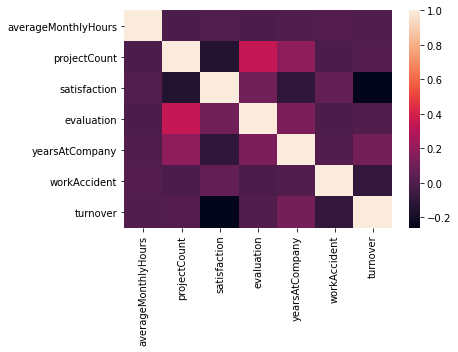

In [19]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

###   Korrelationsmatrix & Heatmap
***
**korrelation moderat positiv:** 
- projectCount vs evaluation: 0.34
- yearsCompany vs projectCount: 0.19

**korrelation moderat negativ:**
 - satisfaction vs turnover:  -0.21

**Fragen:**
- Welche Merkmale beinflussen die Variable (turnover)?
- Welche Merkmale haben eine Grosser Korrelation zwischen andere Merkmale?
- Wie Können die Korrelation besser verstanden werden?

**Zusammenfassung:**

Es gibt eine **positiv Korrelation** zwichen die Atributten  projectCount und Evaluation.

Die Angestellter, die in meheren Projekten arbeiten, arbeiten mehr und bekommen besseren.

Es gibt **negativ Korelation** zwischen die Atributten satisfaction e turnover.

Man kann davon ausgehen, dass Mitarbeiter, die das Unternehmen am häufigsten verlassen, weniger zufrieden sind.

#### Distribution von Merkmale .
- Satisfaction
- Evaluation
- Monthly Hour

/Users/felipesantana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


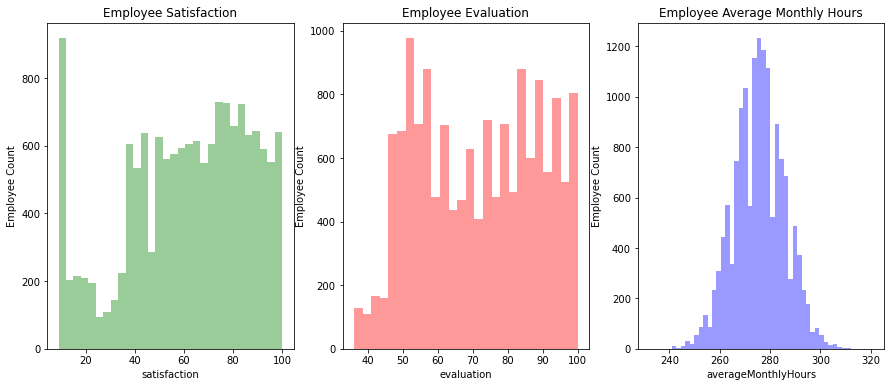

In [20]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction')
axes[0].set_ylabel('Employee Count')

sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation')
axes[1].set_ylabel('Employee Count')

sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours')
axes[2].set_ylabel('Employee Count')
plt.show()

 ## Distribution (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Summary:** Distribution von Merkmale :
 - **Satisfaction** - Es gibt ein Gipfel von Miarbeiter, die nicht Zufrieden mit groesser Konzetration zwischen 60 und 80.
 - **Evaluation** - Die bimodal Distribution von Miarbeiter mit eine niedriger Bewertung ist kleienr als 60 und groesser als 80.
 - **AverageMonthlyHours** - Die Konzentration von Arbeitsstunden in der letzen 3 Monaten, ist circa 275 Stunden.
 
**Frage:** 
 - Welche sind die häufige Uhrsache für die umzufriedenheit der Miarbeiter?

#### Fluktuation der  Mitarbeiter vs Gehalt.

In [ ]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover');

 ##  Salary V.S. Turnover
***
**Summary:**
 - Ein großteil von den Mitarbeiter, die das Unternehmmen haben ein **niedriger** oder **Durchschnittlische**  Gehalt.
 - Mitarbeiter die Gute verdinnen haben kaum das Unternehmen verlassen.
 
**Fragen:** 
 - Wie ist das Arbeitsklima? 
 - Warum verlassen Mitarbeiter, die gute verdinnen .

####  Fluktuation für jede Abteilung.

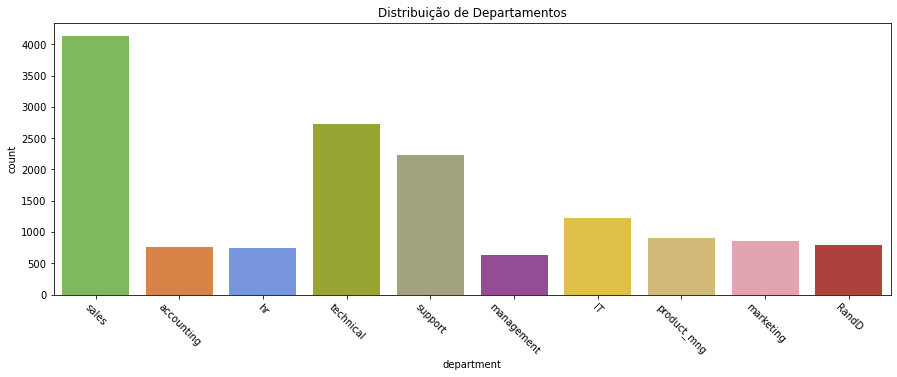

In [22]:
f, ax = plt.subplots(figsize=(15, 5))
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
plt.xticks(rotation=-45)

sns.countplot(x='department', data=df, palette=color_types).set_title('Distribuição de Departamentos');

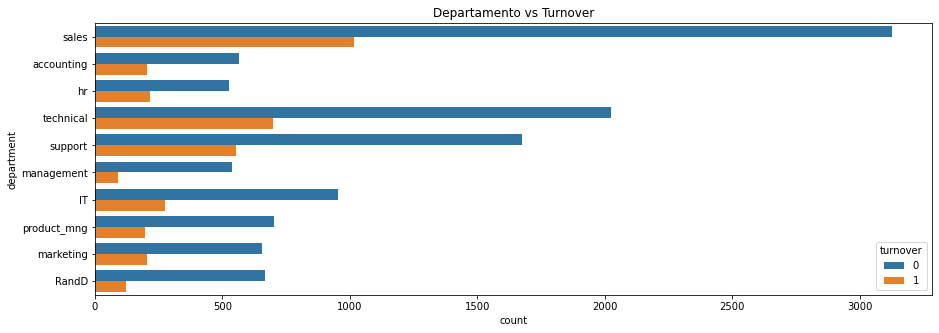

In [23]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Departamento vs Turnover');

## Department V.S. Turnover 
***
**Summary:** Sehen wir uns weitere Informationen zu den Abteilungen des Unternehmens an.
 - Die Abteilungs Verkauf, Technisch und  Support sind die Abteilung mit grosser Fluktuation.
 - Die Abteilung Management hat eine kleine Fluktuation.

**Fragen :** 
 - wenn die Abteilung mit grosser Fluktuation besser untersucht werden, wird die Fluktuation sich verbessern?
 - Wie hoch sind die die Gehälter in der Anteilung?

#### Überprüfung der Fluktuation gegen die Anzahl der Projekte.

[]

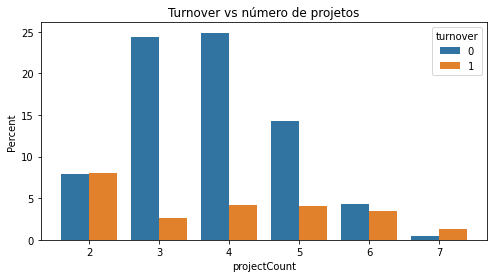

In [24]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Turnover vs número de projetos')
plt.plot()

##  Fluktuation V.S. ProjectCount 
***
**Summary:** interessanten informationen:
 - Mehr als die hälfte der Angestellter haben das Unternehmen verlassen mit **2,6 e 7 Prokjeten**.
 - Die Miarbeiter mit **3 à 5 Projekt** verlasssen das Unternehmen.
 - Alle Miarbeiter mit **7 Projketen** haben das Unternehmen verlassen.
 - Es gibt einem **kleinem steigende Tendenz der Flaktuation ** in bezug auf die anzahl der Projekten.
 
**Fragen:**
 - Warum die Miarbeiter das Unternehmen verlassen, wenn die anzahl der Projketen steigt ?
 - Ist es sinnvoll zu glauben, dass die Mitarbeiter, die an 2 oder weniger Projekten beteiligt sind, unmotiviert sind und deshalb das Unternehmen verlassen?
 - Fühlen sich Mitarbeiter, die an mehr als 6 Projekten beteiligt sind, überfordert und verlassen das Unternehmen?

#### Fluktuation und Bewertung des Angestellter.

[]

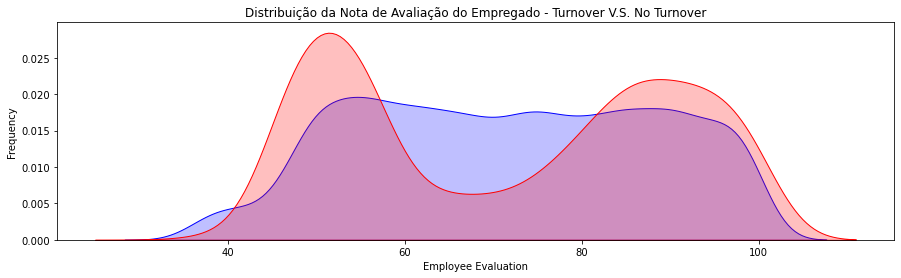

In [25]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Fluktuation und Bewertung des Angestellter- Turnover V.S. No Turnover')
plt.plot()

## Fluktuation V.S. Bewertung des Angestellter 
***
**zusammenfassung:** 
 - distribution bimodal für die Mitarbeiter, die das Unternehmen verlassen haben.
 - Mitarbeiter mit **niedriger performance** verlassen das Unternehmen .
 - Mitarbeiter mit **hoch performance** verlassen das Unternehmen.
 - Das **Idealpunkt** für die  Mitarbeiter sind zwischen 60 und 80.

####  Fluktuation in vergleich mit der Zufriedenheit der  Mitarbeiter.

[]

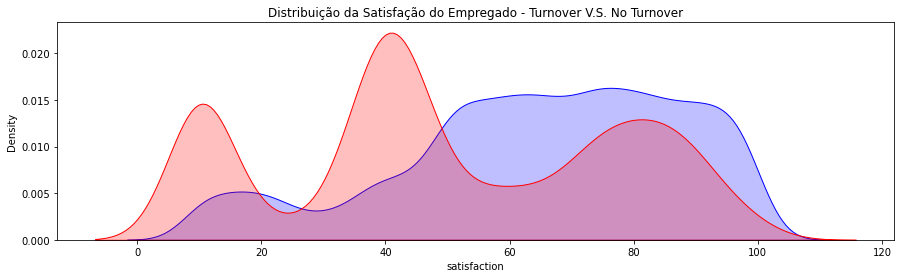

In [26]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Fluktuation in vergleich mit der Zufriedenheit der Angesllter V.S. No Turnover')
plt.plot()

 ##  Fluktuation V.S. Satisfaction 
***
**Summary:** 
 -  Mitarbeiter mit Zufriedenheit von 20 oder weniger verlassen das Unternehmen.
 -  Mitarbeiter mit den Zufriedenheit bis 50 haben die grosser Wahrscheinlichkeit das Unternehmen verlassen.

#### Anzahl der Projekten und Bewertung des Angestellter .

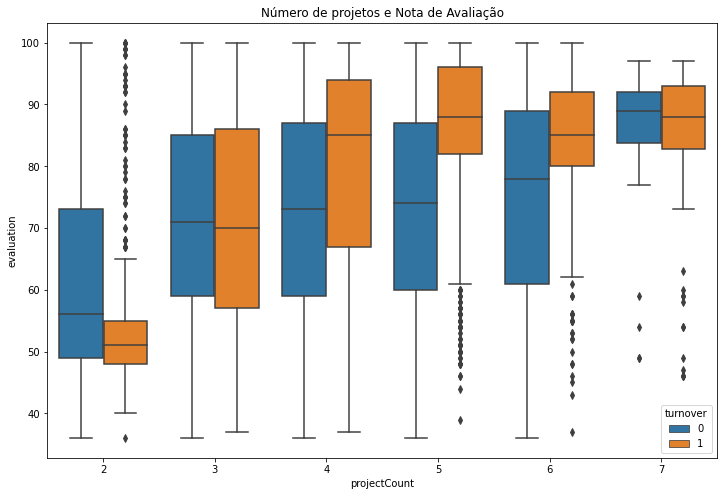

In [27]:
fig = plt.figure(figsize=(12, 8))
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)
plt.title("Número de projetos e Nota de Avaliação")
plt.show()

##  ProjectCount VS Evaluation
**Summary:** 
- **Eine Erhöhung der Bewertung** gibt es für Mitarbeiter, die mehr Projekte innerhalb der Gruppe haben und das Unternehmen    verlassenhaben. 
- Für die Gruppe der Personen, die im Unternehmen blieben, hatten die Mitarbeiter trotz der Zunahme der **Projektzahlen eine konstante Bewertungspunktzahl**.
- Mitarbeiter, die im Unternehmen blieben, hatten eine **durchschnittliche Bewertung von rund 70 %**, obwohl die Anzahl der Projekte zunahm .
- Dieses Verhältnis ändert sich dramatisch bei Mitarbeitern, die das Unternehmen verlassen haben. Ab 3 Projekten steigen die **Bewertungsdurchschnitte deutlich** an..
- Mitarbeiter, die **zwei Projekte und eine schlechte Bewertung** hatten, sind gegangen.
- Mitarbeiter mit **mehr als 3 Projekten und hohen Bewertungen** haben das Unternehmen verlassen.

**Fragen:**
  - Woran liegt es, dass die Mitarbeiter, die ausgeschieden sind, im Durchschnitt eine höhere Bewertung hatten als die Mitarbeiter, die nicht ausgeschieden sind, selbst bei einer Zunahme der Anzahl von Projekten?
  - Sollten Mitarbeiter mit niedrigeren Ratings nicht eher das Unternehmen verlassen?

#### Überprüfung des Zusammenhangs zwischen Angestellterzufriedenheit und deren Bewertung.

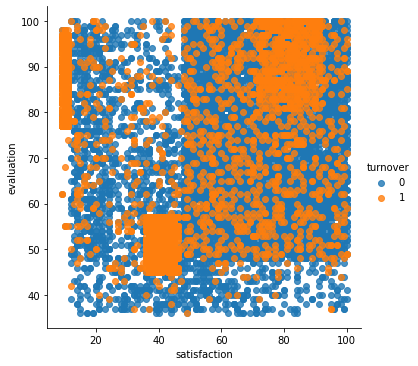

In [28]:
sns.lmplot(x = 'satisfaction', 
           y = 'evaluation', 
           data = df,
           fit_reg = False,
           hue='turnover')

## Satisfaction VS Evaluation
***
**Summary:**:Wir haben hier 3 verschiedene Gruppen von Mitarbeitern.
 
**Cluster 1 (Unzufriedene Mitarbeiter und engagierte Mitarbeiter):** Die Zufriedenheit lag unter 20 und die Bewertungen über 75. 
- Das ist ein Hinweis, dass die Mitarbeiter, die das Unternehmen verlassen haben und engagierte Mitarbeiter waren, sich aber bei der Arbeit nicht gut fühlten.

Fragen: 
 - Was könnte der Grund sein, sich so schlecht zu fühlen, wenn man hoch bewertet wird?? 
 - Die Arbeitlast ist zu gross? 
 - Dieser Cluster könnte Mitarbeiter bedeuten, die überarbeitet sind? 
 
**Cluster 2 (Schlechte und unzufriedene Mitarbeiter):** Zufriedenheit zwischen 35 und 50 und Ihre Bewertungen unter ~58. 

Fragen:
- Fühlen sich die Mitarbeiter schlecht, wenn sie schlecht bewertet wurden?
- hat diese Gruppe eine schlecht Leistung?

**Cluster 3 (Zufriedene Mitarbeiter und engagierte Mitarbeiter):** Zufriedenheit zwischen 75 und 90 und Bewertungen über 80. 
- Was könnte es bedeuten, dass Mitarbeiter in dieser Gruppe „ideal“ waren ? 
- Die Mitarbeiter haben den Job genossen  und wurden gute bewertet .

Fragen: 
- Kann diese Gruppe von Mitarbeiter repräsentieren, die das Unternehmen verlassen haben, weil sie eine andere Arbeitsmöglichkeit gefunden haben?
- Es wäre möglische mehr als  3 clusters zu haben?

#### Clusters

#### Importieren  Scikit-learn

In [29]:
from sklearn.cluster import KMeans

#### Cluster initialisieren.

In [30]:
kmeans = KMeans(n_clusters=3,random_state=2)

#### Den Datensatz definieren.

In [31]:
df_turnover = df[df.turnover==1][["satisfaction","evaluation"]]

#### Berechnung der Cluster.

In [32]:
kmeans.fit(df_turnover)

KMeans(n_clusters=3, random_state=2)

In [33]:
kmeans_colors = ['green' if c == 0 else 'red' if c == 1 else 'blue' for c in kmeans.labels_]

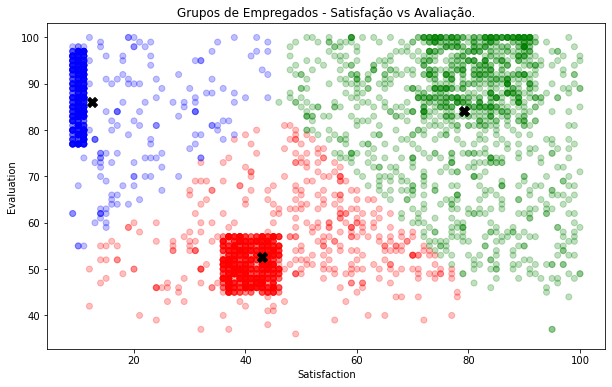

In [34]:
fig = plt.figure(figsize=(10, 6))
plt.scatter( x="satisfaction"
            ,y="evaluation"
            ,data=df_turnover,
            alpha=0.25,color = kmeans_colors)

plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")

plt.scatter( x=kmeans.cluster_centers_[:,0]
            ,y=kmeans.cluster_centers_[:,1]
            ,color="black"
            ,marker="X",s=100)

plt.title("Grupos de Empregados - Satisfação vs Avaliação.")
plt.show()

## K-Means Grupos

**Cluster 0 (Grün):** engagierte und zufriedene Mitarbeiter.

**Cluster 1 (Rot):** Schlechte und unzufriedene Mitarbeiter. 

**Cluster 2 (Blau):** engagierte und unzufriedene Mitarbeiter.

#### Überprüfung des Verhältnisses zwischen Zeit im Unternehmen und Flaktuation.

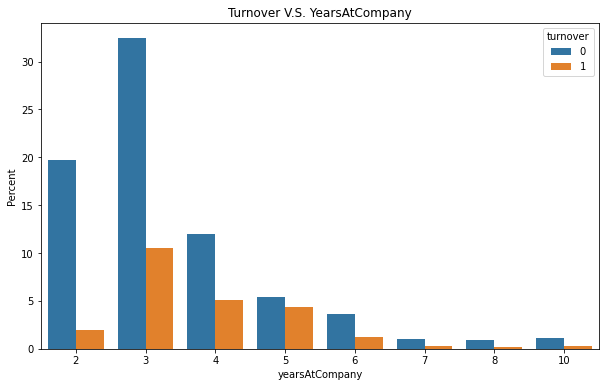

In [35]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title("Turnover V.S. YearsAtCompany")
plt.show()

 ##  Fluktuation V.S. Mitarbeiterbindung
***
**Summary:** Sehen wir uns einige weitere Punkte an, um zu verstehen, warum Mitarbeiter das Unternehmen verlassen.
 - Mitarbeiter mit **4 und 5 Dienstjahren** haben das Unternehmen verlassen..
 - Mitarbeiter über **5 Dienstjahre** müssen untersucht werden..
 
**Fragen:**
  -  Warum die Mitarbeiter mit 3 bis 5 Jahren in den Unternehmen kündigen?
  - wer sind die Mitarbeiter die da untenemen verlassen?

### Laden der  Datein in den Data Lake
.

In [36]:
import joblib

#### Persistentes Cluster-Objekt auf dem Datenträger.

In [ ]:
joblib.dump(kmeans, "cluster.joblib")

#### Übertragen der Datei an den Data Lake.

In [38]:
client.fput_object(
    "curated",
    "cluster.joblib",
    "cluster.joblib"
)

# Sweetviz

In [39]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [40]:
import sweetviz as sv

my_report = sv.analyze(df,"turnover")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
